## Week 3 Peer Graded Assignment - Segmenting and Clustering Neighborhoods in Toronto (Borough of Scarborough)
Karen McEwen \
February 2020

## Part 3 - Explore and cluster neighborhoods in Toronto

You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you. Just make sure:\
-to add enough Markdown cells to explain what you decided to do and to report any observations you make.\
-to generate maps to visualize your neighborhoods and how they cluster together.\
-Once you are happy with your analysis, submit a link to the new Notebook on your Github repository.

## 1. Choose to explore the neighborhoods in the borough of Scarborough

In [1]:
# Download packages we will need - from the New York lab
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    sci

In [2]:
# upload the file from part 2 of the lab into a new dataframe
t_df = pd.read_csv('toronto_neigh_coord.csv')
print('file uploaded')

file uploaded


In [51]:
from IPython.display import display, Image

In [3]:
t_df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [4]:
t_df.describe(include='all')

,Postcode,Borough,Neighbourhood,Latitude,Longitude
count,103,103,103,103.000000,103.000000
unique,103,11,102,NaN,NaN
top,M4G,North York,Queen's Park,NaN,NaN
freq,1,24,2,NaN,NaN
mean,NaN,NaN,NaN,43.704608,-79.397153
std,NaN,NaN,NaN,0.052463,0.097146
min,NaN,NaN,NaN,43.602414,-79.615819
25%,NaN,NaN,NaN,43.660567,-79.464763
50%,NaN,NaN,NaN,43.696948,-79.388790
75%,NaN,NaN,NaN,43.745320,-79.340923


### Basic info
There are 103 postcodes with 11 unique boroughs.  Because there are more than one neighborhood in several postcodes, using describe does not give us the correct count of neighborhoods.  We could consider using the mean value of the latitude and longitude to start to open a map.  That should give us the center of all of the postcode coordinates.

In [5]:
## First Map of Toronto using mean of data for latitude and longitude
lat = t_df.loc[:,'Latitude'].mean()
long = t_df.loc[:,'Longitude'].mean()
print('mean latitude is {}\n mean longitude is {}'.format(lat, long))

mean latitude is 43.70460773398059
 mean longitude is -79.39715291165048


In [6]:
# create a map using folium
map_toronto = folium.Map(location=[lat, long], zoom_start=12)
map_toronto

## Basic Map of Toronto
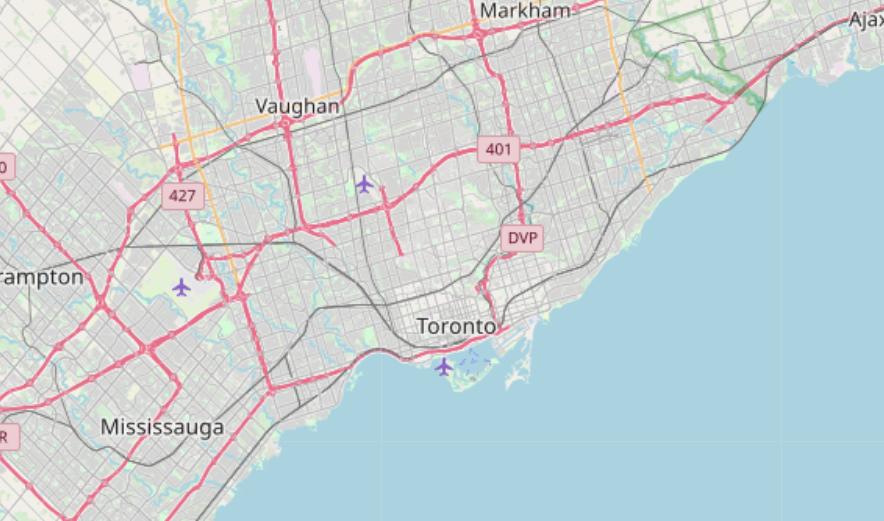

Here is a basic map of Toronto centered on the center of all the neighborhoods.  \
With a zoom start of 12 you can see several of the Boroughs listed.

In [7]:
# create a dataframe that includes only the neighborhoods from the Borough of Scarborough
#df_toronto_postcode.loc[df_toronto_postcode['Borough'] == 'Queen\'s Park', 'Neighbourhood'] = 'Queen\'s Park'
scarborough_df=t_df.loc[t_df['Borough']=='Scarborough']
scarborough_df.head(20)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


There are 17 separate postal codes for the Borough of Scarborough, and 33 neighborhoods. \
From Wikipedia - "Scarborough City Centre is a commercial district in Toronto, Ontario, Canada. Once considered the city centre for the former city of Scarborough, which was amalgamated with the rest of Toronto in 1998, the city centre remains as one of the major business districts outside Downtown Toronto."

#### Define Foursquare Credentials and Version

In [10]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [11]:
# From the Foursquare lab - the user_agent name is one we choose
# start with the Scarborough Civic Center
address = '150 Borough Dr, Scarborough, ON M1P 4N7, Canada'

geolocator = Nominatim(user_agent="foursquare_scarborough_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Latitude and longitude of the Scarborough Civic Center are: ',latitude, longitude)

Latitude and longitude of the Scarborough Civic Center are:  43.7729485 -79.25758651785713


## Create a map of Scarborough with postal codes/neighborhoods superimposed on top.

In [12]:
# create folium map of Scarborough centered on the Civic Center
# using latitude and longitude values
map_scarborough = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map to show the neighbourhoods/postal codes
for lat, lng, borough, neighborhood in zip(scarborough_df['Latitude'], scarborough_df['Longitude'], scarborough_df['Borough'], scarborough_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_scarborough)  
    
map_scarborough

### Scarborough Map with Neighborhoods Marked
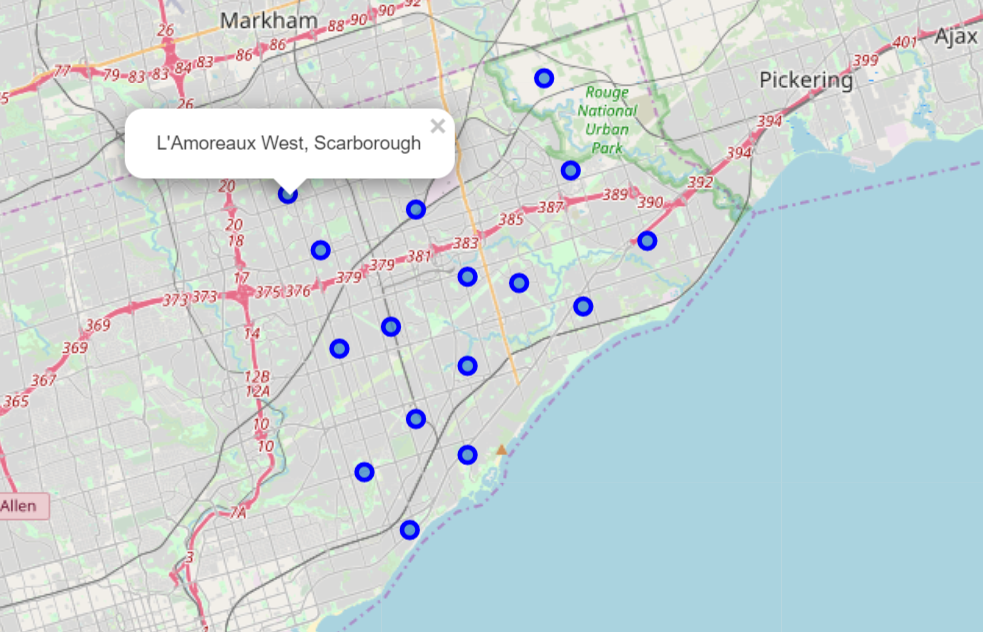

## Let's explore the Scarborough Village Neighborhood

In [13]:
# Scarborough Village is index=5
scarborough_df.loc[5, 'Neighbourhood']

'Scarborough Village'

In [14]:
# get the latitude and longitude values
neighborhood_latitude = scarborough_df.loc[5, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = scarborough_df.loc[5, 'Longitude'] # neighborhood longitude value

neighborhood_name = scarborough_df.loc[5, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Scarborough Village are 43.7447342, -79.23947609999998.


## Get the top 100 venues within 1000 meters

In [15]:
# GET request
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=45DHAMVVN3GXOW1HKEJAGPU1EYEVLWI2QO2HYJZ2ZWAQLG0B&client_secret=RD45MBHGBIYOSWK0C140EUFA4GIHMN5E10OPCOOV1DU2NWKW&v=20200131&ll=43.7447342,-79.23947609999998&radius=1000&limit=100'

In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e42cf27211536001b0fb64a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Eglinton East',
  'headerFullLocation': 'Eglinton East, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 12,
  'suggestedBounds': {'ne': {'lat': 43.753734209000015,
    'lng': -79.22704135077875},
   'sw': {'lat': 43.73573419099999, 'lng': -79.2519108492212}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b5cc7c9f964a520a84329e3',
       'name': 'Diamond Pizza',
       'location': {'address': 'Danforth Road',
        'lat': 43.743699384861635,
        'lng': -79.24592163153024,
        'labeledLatLngs': [{'label': 'display',
          'lat': 

From the Foursquare lab, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Diamond Pizza,Pizza Place,43.743699,-79.245922
1,Dairy Queen,Ice Cream Shop,43.739506,-79.236894
2,Tim Hortons,Coffee Shop,43.738992,-79.238961
3,Dairy Queen,Ice Cream Shop,43.739580,-79.236991
4,Subway,Sandwich Place,43.738284,-79.236792


#### How many venues were returned by Foursquare?

In [19]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

12 venues were returned by Foursquare.


In [23]:
# create folium map of venues in Scarborough Village
# using latitude and longitude values
latitude = 43.744734
longitude = -79.239476
map_village = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map to show the neighbourhoods/postal codes
for lat, lng, name, category in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'], nearby_venues['categories']):
    label = '{}, {}'.format(category, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_village)  
    
map_village

### Map of Scarborough Village Neighborhood with Venues Marked
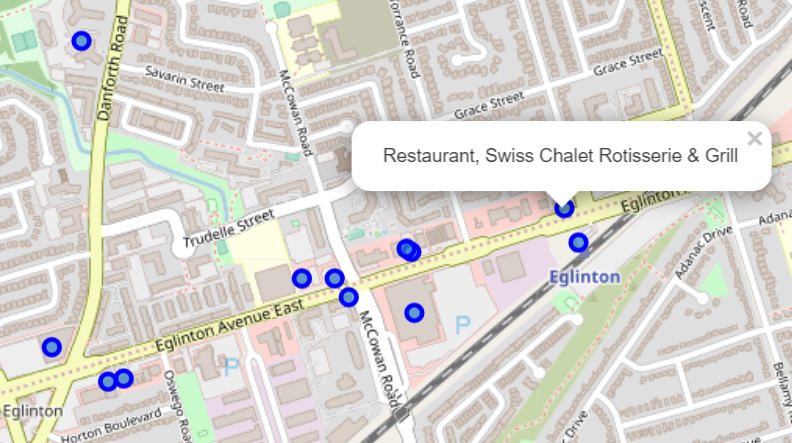

## 2. Explore all the neighborhoods in the Borough of Scarborough

In [24]:
# from the New York Neighborhood lab
# create a function to do the same with all of the neighborhoods (actually postcodes)
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [25]:
# run the function on each postal code in our dataframe for Scarborough
scarborough_venues = getNearbyVenues(names=scarborough_df['Neighbourhood'],
                                   latitudes=scarborough_df['Latitude'],
                                   longitudes=scarborough_df['Longitude']
                                  )


Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge


In [26]:
# size of dataframe
print(scarborough_venues.shape)
scarborough_venues.head()

(84, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge, Malvern",43.806686,-79.194353,Interprovincial Group,43.805630,-79.200378,Print Shop
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Chris Effects Painting,43.784343,-79.163742,Construction & Landscaping
3,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
4,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Affordable Toronto Movers,43.787919,-79.162977,Moving Target


#### Number of venues in each neighborhood

In [27]:
scarborough_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",2,2,2,2,2,2
"Birch Cliff, Cliffside West",4,4,4,4,4,4
Cedarbrae,8,8,8,8,8,8
"Clairlea, Golden Mile, Oakridge",9,9,9,9,9,9
"Clarks Corners, Sullivan, Tam O'Shanter",13,13,13,13,13,13
"Cliffcrest, Cliffside, Scarborough Village West",2,2,2,2,2,2
"Dorset Park, Scarborough Town Centre, Wexford Heights",5,5,5,5,5,5
"East Birchmount Park, Ionview, Kennedy Park",4,4,4,4,4,4


#### Categories of venues in each neighborhood

In [28]:
print('There are {} uniques categories.'.format(len(scarborough_venues['Venue Category'].unique())))

There are 54 uniques categories.


## 3. Analyze Each Neighborhood

In [29]:
# one hot encoding
scarborough_onehot = pd.get_dummies(scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
scarborough_onehot['Neighborhood'] = scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [scarborough_onehot.columns[-1]] + list(scarborough_onehot.columns[:-1])
scarborough_onehot = scarborough_onehot[fixed_columns]

scarborough_onehot.head()

,Neighborhood,American Restaurant,Athletics & Sports,Bakery,Bank,Bar,Breakfast Spot,Burger Joint,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Stadium,Construction & Landscaping,Convenience Store,Department Store,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Gas Station,General Entertainment,Grocery Store,Gym Pool,Hakka Restaurant,Hobby Shop,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Lounge,Medical Center,Mexican Restaurant,Middle Eastern Restaurant,Motel,Moving Target,Noodle House,Park,Pet Store,Pharmacy,Pizza Place,Playground,Print Shop,Rental Car Location,Sandwich Place,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Thai Restaurant,Vietnamese Restaurant
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# dataframe size
scarborough_onehot.shape

(84, 55)

#### group rows by neighborhood and by taking the mean of the frequency of each category

In [31]:
scarborough_grouped = scarborough_onehot.groupby('Neighborhood').mean().reset_index()
scarborough_grouped

,Neighborhood,American Restaurant,Athletics & Sports,Bakery,Bank,Bar,Breakfast Spot,Burger Joint,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Stadium,Construction & Landscaping,Convenience Store,Department Store,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Gas Station,General Entertainment,Grocery Store,Gym Pool,Hakka Restaurant,Hobby Shop,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Lounge,Medical Center,Mexican Restaurant,Middle Eastern Restaurant,Motel,Moving Target,Noodle House,Park,Pet Store,Pharmacy,Pizza Place,Playground,Print Shop,Rental Car Location,Sandwich Place,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Thai Restaurant,Vietnamese Restaurant
0,Agincourt,0.0,0.000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.2,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.2,0.2,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.20,0.00,0.000000,0.000000,0.0
1,"Agincourt North, L'Amoreaux East, Milliken, St...",0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.500000,0.0,0.000000,0.000000,0.5,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0
2,"Birch Cliff, Cliffside West",0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000,0.000000,0.0,0.000000,0.25,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.25,0.00,0.000000,0.000000,0.0
3,Cedarbrae,0.0,0.125,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.125,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.125000,0.125000,0.00,0.000000,0.000000,0.125,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.125000,0.0
4,"Clairlea, Golden Mile, Oakridge",0.0,0.000,0.222222,0.000000,0.000000,0.000000,0.000000,0.222222,0.111111,0.00,0.000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.00,0.111111,0.0,0.111111,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.111111,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.111111,0.000000,0.0
5,"Clarks Corners, Sullivan, Tam O'Shanter",0.0,0.000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.076923,0.0,0.000000,0.00,0.000000,0.076923,0.00,0.000000,0.076923,0.076923,0.076923,0.00,0.000000,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.076923,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.076923,0.000000,0.0,0.076923,0.153846,0.0,0.0,0.000000,0.000000,0.076923,0.00,0.00,0.000000,0.076923,0.0
6,"Cliffcrest, Cliffside, Scarborough Village West",0.5,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0
7,"Dorset Park, Scarborough Town Centre, Wexford ...",0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.200000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.

In [32]:
scarborough_grouped.shape

(16, 55)

#### Top 5 venues in each neighborhood in Scarborough

In [33]:
num_top_venues = 5

for hood in scarborough_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = scarborough_grouped[scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0  Latin American Restaurant   0.2
1             Breakfast Spot   0.2
2               Skating Rink   0.2
3                     Lounge   0.2
4             Clothing Store   0.2


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                 venue  freq
0                 Park   0.5
1           Playground   0.5
2  American Restaurant   0.0
3         Intersection   0.0
4   Italian Restaurant   0.0


----Birch Cliff, Cliffside West----
                   venue  freq
0        College Stadium  0.25
1           Skating Rink  0.25
2  General Entertainment  0.25
3                   Café  0.25
4              Pet Store  0.00


----Cedarbrae----
                venue  freq
0    Hakka Restaurant  0.12
1              Bakery  0.12
2                Bank  0.12
3     Thai Restaurant  0.12
4  Athletics & Sports  0.12


----Clairlea, Golden Mile, Oakridge----
            venue  freq
0          Bakery  0.22
1        Bus Line  0.22
2  Ic

#### Let's put that into a pandas dataframe
First, let's write a function to sort the venues in descending order.

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = scarborough_grouped['Neighborhood']

for ind in np.arange(scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agincourt,Clothing Store,Skating Rink,Breakfast Spot,Latin American Restaurant,Lounge
1,"Agincourt North, L'Amoreaux East, Milliken, St...",Playground,Park,Vietnamese Restaurant,Clothing Store,Grocery Store
2,"Birch Cliff, Cliffside West",General Entertainment,Skating Rink,Café,College Stadium,Vietnamese Restaurant
3,Cedarbrae,Hakka Restaurant,Athletics & Sports,Bakery,Bank,Gas Station
4,"Clairlea, Golden Mile, Oakridge",Bakery,Bus Line,Soccer Field,Ice Cream Shop,Intersection


#### Scarborough 

may not be the most diverse of the boroughs that I could have chosen... \
There are some stores, a breakfast spot, a bakery, a Hakka restaurant, \
and the 5th most common venue in Clairlea is an intersection.  

## 4. Cluster Neighborhoods - 3 Clusters
Run k-means to cluster the neighborhoods of Scarborough into 3 clusters.

In [36]:
# set number of clusters
kclusters = 3

scarborough_grouped_clustering = scarborough_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scarborough_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:16] 

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [43]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# change the column in scarborough_df from 'Neighbourhood' to 'Neighborhood'

scarborough_df.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)
scarborough_merged = scarborough_df

# merge scarborough_grouped with neighborhoods_venues_sorted to add latitude/longitude for each neighborhood
scarborough_merged = scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

scarborough_merged.head(20) # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,0.0,Fast Food Restaurant,Print Shop,Vietnamese Restaurant,Clothing Store,Grocery Store
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,0.0,Bar,Construction & Landscaping,Moving Target,Vietnamese Restaurant,Coffee Shop
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,Intersection,Breakfast Spot,Rental Car Location,Electronics Store,Pizza Place
3,M1G,Scarborough,Woburn,43.770992,-79.216917,2.0,Coffee Shop,Korean Restaurant,Vietnamese Restaurant,Grocery Store,General Entertainment
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,Hakka Restaurant,Athletics & Sports,Bakery,Bank,Gas Station
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,1.0,Playground,Vietnamese Restaurant,Clothing Store,Grocery Store,General Entertainment
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,0.0,Hobby Shop,Coffee Shop,Department Store,Chinese Restaurant,Gym Pool
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,0.0,Bakery,Bus Line,Soccer Field,Ice Cream Shop,Intersection
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,0.0,American Restaurant,Motel,Coffee Shop,Grocery Store,General Entertainment
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0.0,General Entertainment,Skating Rink,Café,College Stadium,Vietnamese Restaurant


#### Problem - index number 16 Upper Rouge has NaN for all the columns after longitude
Looking at the map, Upper Rouge is in the middle of a park and has nothing within 1000 feet \
of the given latitude and longitude that could be found on Foursquare.  \
To fix the problem and continue with the project, I will exclude Upper Rouge from the dataframe.

In [44]:
# drop index number 16 Upper Rouge from the dataframe because there is nothing nearby
# df.drop([0, 1])
scarborough_merged.drop([16], axis=0, inplace=True)
scarborough_merged.head(20)

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,0.0,Fast Food Restaurant,Print Shop,Vietnamese Restaurant,Clothing Store,Grocery Store
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,0.0,Bar,Construction & Landscaping,Moving Target,Vietnamese Restaurant,Coffee Shop
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,Intersection,Breakfast Spot,Rental Car Location,Electronics Store,Pizza Place
3,M1G,Scarborough,Woburn,43.770992,-79.216917,2.0,Coffee Shop,Korean Restaurant,Vietnamese Restaurant,Grocery Store,General Entertainment
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,Hakka Restaurant,Athletics & Sports,Bakery,Bank,Gas Station
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,1.0,Playground,Vietnamese Restaurant,Clothing Store,Grocery Store,General Entertainment
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,0.0,Hobby Shop,Coffee Shop,Department Store,Chinese Restaurant,Gym Pool
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,0.0,Bakery,Bus Line,Soccer Field,Ice Cream Shop,Intersection
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,0.0,American Restaurant,Motel,Coffee Shop,Grocery Store,General Entertainment
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0.0,General Entertainment,Skating Rink,Café,College Stadium,Vietnamese Restaurant


In [45]:
# make sure the cluster index is an integer
# df.astype({'col1': 'int32'}).dtypes
scarborough_merged.astype({'Cluster Labels':'int32'}).dtypes


Postcode                  object
Borough                   object
Neighborhood              object
Latitude                 float64
Longitude                float64
Cluster Labels             int32
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
dtype: object

In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(scarborough_merged['Latitude'], scarborough_merged['Longitude'], scarborough_merged['Neighborhood'], scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Map of Scarborough Clusters
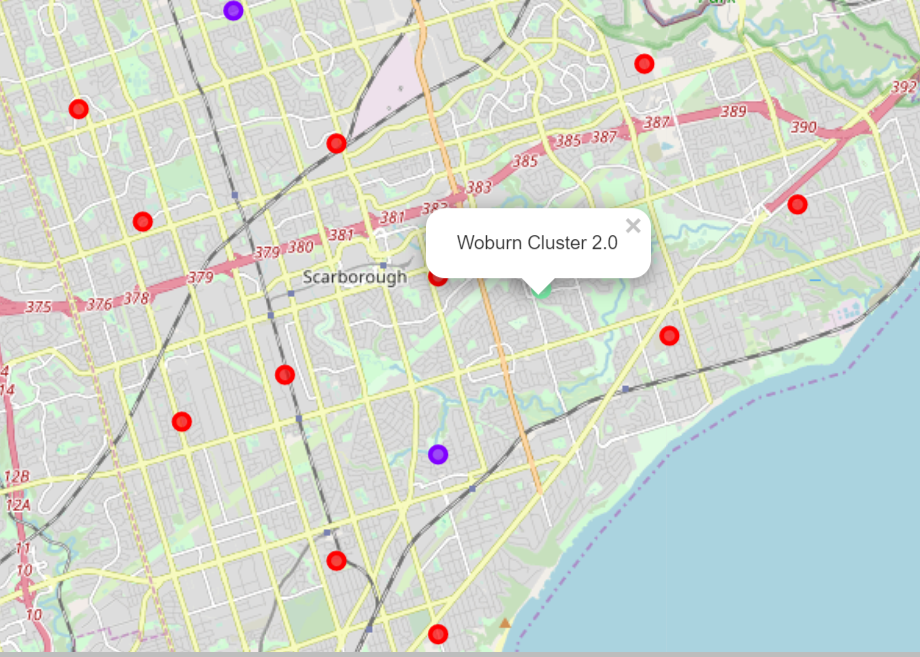

### Analysis of Clusters


Dividing the Borough of Scarborough into 3 clusters resulted in one neighborhood being included in the green cluster, two neighborhoods in the purple cluster and 13 neighborhoods in the red cluster.

#### Red cluster 
The Red cluster has a wide range of restaurants, shops, and businesses, none of which is necessarily common across all of the areas.

In [47]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 0, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Scarborough,0.0,Fast Food Restaurant,Print Shop,Vietnamese Restaurant,Clothing Store,Grocery Store
1,Scarborough,0.0,Bar,Construction & Landscaping,Moving Target,Vietnamese Restaurant,Coffee Shop
2,Scarborough,0.0,Intersection,Breakfast Spot,Rental Car Location,Electronics Store,Pizza Place
4,Scarborough,0.0,Hakka Restaurant,Athletics & Sports,Bakery,Bank,Gas Station
6,Scarborough,0.0,Hobby Shop,Coffee Shop,Department Store,Chinese Restaurant,Gym Pool
7,Scarborough,0.0,Bakery,Bus Line,Soccer Field,Ice Cream Shop,Intersection
8,Scarborough,0.0,American Restaurant,Motel,Coffee Shop,Grocery Store,General Entertainment
9,Scarborough,0.0,General Entertainment,Skating Rink,Café,College Stadium,Vietnamese Restaurant
10,Scarborough,0.0,Indian Restaurant,Vietnamese Restaurant,Pet Store,Chinese Restaurant,Coffee Shop
11,Scarborough,0.0,Smoke Shop,Bakery,Breakfast Spot,Middle Eastern Restaurant,Vietnamese Restaurant


#### Purple cluster
The Purple cluster has as its most common venue playgrounds and parks followed by Vietnamese restaurants and grocery stores.  It is likely primarily residential neighborhoods with families, possibly of Vietnamese descent.

In [48]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 1, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Scarborough,1.0,Playground,Vietnamese Restaurant,Clothing Store,Grocery Store,General Entertainment
14,Scarborough,1.0,Playground,Park,Vietnamese Restaurant,Clothing Store,Grocery Store


#### Green cluster
The Green cluster consists of a single neighborhood.  I am not sure makes it different from the red cluster, except that its most common venue is coffee shops.

In [49]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 2, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Scarborough,2.0,Coffee Shop,Korean Restaurant,Vietnamese Restaurant,Grocery Store,General Entertainment


### Thank you for looking at the Borough of Scarborough in the city of Toronto!